In [1]:
import h5py
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

In [2]:
# Helper function to read dataset from hdf5 reference
def read_hdf5_dataset(f, ref):
    return np.array(f[ref])

In [3]:
# Load the HDF5 file
file_path = "../Data/fullData.mat"
with h5py.File(file_path, 'r') as f:
    # Extract sensor data

    sensorA_train = [[read_hdf5_dataset(f, ref) for ref in f['sensorA_train'][i]] for i in range(f['sensorA_train'].shape[0])]
    sensorA_test = [[read_hdf5_dataset(f, ref) for ref in f['sensorA_test'][i]] for i in range(f['sensorA_test'].shape[0])]

    sensorB_train = [[read_hdf5_dataset(f, ref) for ref in f['sensorB_train'][i]] for i in range(f['sensorB_train'].shape[0])]
    sensorB_test = [[read_hdf5_dataset(f, ref) for ref in f['sensorB_test'][i]] for i in range(f['sensorB_test'].shape[0])]

    sensorC_train = [[read_hdf5_dataset(f, ref) for ref in f['sensorC_train'][i]] for i in range(f['sensorC_train'].shape[0])]
    sensorC_test = [[read_hdf5_dataset(f, ref) for ref in f['sensorC_test'][i]] for i in range(f['sensorC_test'].shape[0])]

       # Combine training and test data for each sensor
    sensorA_sub1 = np.concatenate((sensorA_train[0][0], sensorA_test[0][0]), axis=1)
    sensorA_sub2 = np.concatenate((sensorA_train[1][0], sensorA_test[1][0]), axis=1)
    sensorA_sub3 = np.concatenate((sensorA_train[2][0], sensorA_test[2][0]), axis=1)
    sensorA_sub4 = np.concatenate((sensorA_train[3][0], sensorA_test[3][0]), axis=1)

    sensorB_sub1 = np.concatenate((sensorB_train[0][0], sensorB_test[0][0]), axis=1)
    sensorB_sub2 = np.concatenate((sensorB_train[1][0], sensorB_test[1][0]), axis=1)
    sensorB_sub3 = np.concatenate((sensorB_train[2][0], sensorB_test[2][0]), axis=1)
    sensorB_sub4 = np.concatenate((sensorB_train[3][0], sensorB_test[3][0]), axis=1)

    sensorC_sub1 = np.concatenate((sensorC_train[0][0], sensorC_test[0][0]), axis=1)
    sensorC_sub2 = np.concatenate((sensorC_train[1][0], sensorC_test[1][0]), axis=1)
    sensorC_sub3 = np.concatenate((sensorC_train[2][0], sensorC_test[2][0]), axis=1)
    sensorC_sub4 = np.concatenate((sensorC_train[3][0], sensorC_test[3][0]), axis=1)

    # Extract and concatenate target data
    range_train = f['targets_train']['range'][0]
    range_test = f['targets_test']['range'][0]
    range_combined = np.concatenate((range_train, range_test))
    idx = np.argsort(range_combined)

    targets_train = {key: f['targets_train'][key][0] for key in f['targets_train']}
    targets_test = {key: f['targets_test'][key][0]  for key in f['targets_test']}
    
    targets = {}
    for key in targets_train.keys():
        temp = np.concatenate((targets_train[key], targets_test[key]))
        targets[key] = temp[idx]

    # Sort DataArrays
    sensorA_sub1 = sensorA_sub1.T[idx, :]
    sensorA_sub2 = sensorA_sub2.T[idx, :]
    sensorA_sub3 = sensorA_sub3.T[idx, :]
    sensorA_sub4 = sensorA_sub4.T[idx, :]

    sensorB_sub1 = sensorB_sub1.T[idx, :]
    sensorB_sub2 = sensorB_sub2.T[idx, :]
    sensorB_sub3 = sensorB_sub3.T[idx, :]
    sensorB_sub4 = sensorB_sub4.T[idx, :]

    sensorC_sub1 = sensorC_sub1.T[idx, :]
    sensorC_sub2 = sensorC_sub2.T[idx, :]
    sensorC_sub3 = sensorC_sub3.T[idx, :]
    sensorC_sub4 = sensorC_sub4.T[idx, :]

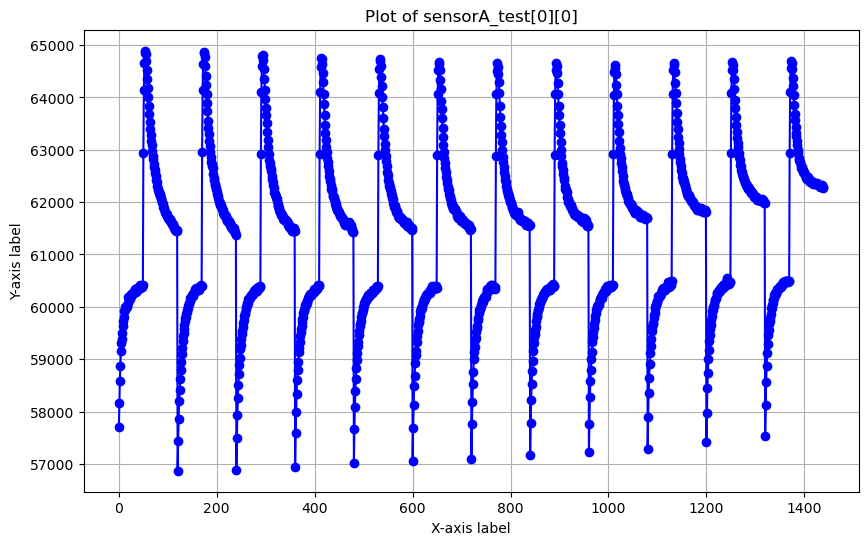

In [4]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(sensorC_sub4[0,:], marker='o', linestyle='-', color='b')  # Customize the plot as needed
plt.xlabel('X-axis label')  # Customize as needed
plt.ylabel('Y-axis label')  # Customize as needed
plt.title('Plot of sensorA_test[0][0]')  # Customize as needed
plt.grid(True)
plt.show()

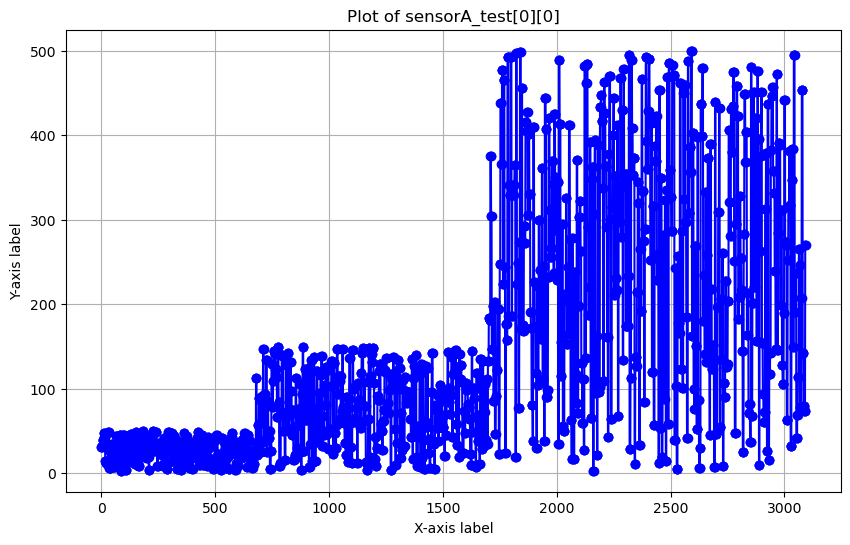

In [5]:
# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(targets['acetone'], marker='o', linestyle='-', color='b')  # Customize the plot as needed
plt.xlabel('X-axis label')  # Customize as needed
plt.ylabel('Y-axis label')  # Customize as needed
plt.title('Plot of sensorA_test[0][0]')  # Customize as needed
plt.grid(True)
plt.show()

In [6]:
# Save the sorted data to new MAT files
sio.savemat("../Data/sensorA.mat", {"sensorA_sub1": sensorA_sub1, "sensorA_sub2": sensorA_sub2, "sensorA_sub3": sensorA_sub3, "sensorA_sub4": sensorA_sub4})
sio.savemat("../Data/sensorB.mat", {"sensorB_sub1": sensorB_sub1, "sensorB_sub2": sensorB_sub2, "sensorB_sub3": sensorB_sub3, "sensorB_sub4": sensorB_sub4})
sio.savemat("../Data/sensorC.mat", {"sensorC_sub1": sensorC_sub1, "sensorC_sub2": sensorC_sub2, "sensorC_sub3": sensorC_sub3, "sensorC_sub4": sensorC_sub4})
sio.savemat("../Data/targets.mat", targets)